In [26]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [27]:
img_size = (150, 150)
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "brain_tumor_dataset",
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=img_size,
    batch_size=batch_size
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "brain_tumor_dataset",
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=img_size,
    batch_size=batch_size
)

class_names = train_ds.class_names
print("Classes:", class_names)


Found 3264 files belonging to 2 classes.
Using 2612 files for training.
Found 3264 files belonging to 2 classes.
Using 652 files for validation.
Classes: ['Testing', 'Training']


In [28]:
normalization_layer = layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

In [29]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')   # binary classification
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
history = model.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 120s 1s/step - accuracy: 0.8462 - loss: 0.4358 - val_accuracy: 0.9049 - val_loss: 0.2890
Epoch 2/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 127s 2s/step - accuracy: 0.8688 - loss: 0.2962 - val_accuracy: 0.9049 - val_loss: 0.2656
Epoch 3/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 123s 1s/step - accuracy: 0.8681 - loss: 0.2835 - val_accuracy: 0.9034 - val_loss: 0.2389
Epoch 4/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 139s 1s/step - accuracy: 0.8674 - loss: 0.2514 - val_accuracy: 0.8972 - val_loss: 0.2315
Epoch 5/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.8807 - loss: 0.2416 - val_accuracy: 0.9064 - val_loss: 0.2303
Epoch 6/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 120s 1s/step - accuracy: 0.8837 - loss: 0.2243 - val_accuracy: 0.8988 - val_loss: 0.2424
Epoch 7/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 126s 2s/step - accuracy: 0.8903 - loss: 0.2322 - val_accuracy: 0.8727 - val_loss: 0.2525
Epoch 8/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 135s 1s/step - accuracy: 0.8816 - loss: 0.2209 - val_accuracy: 0.8865 - v

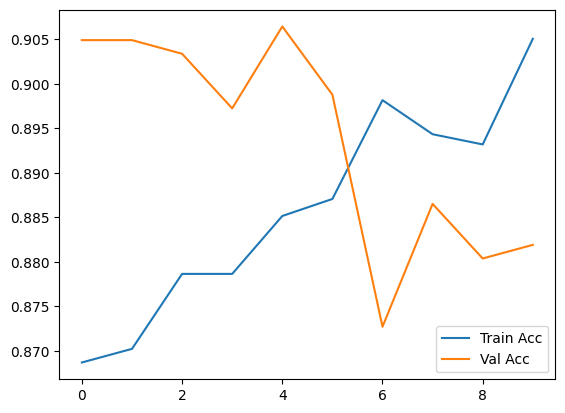

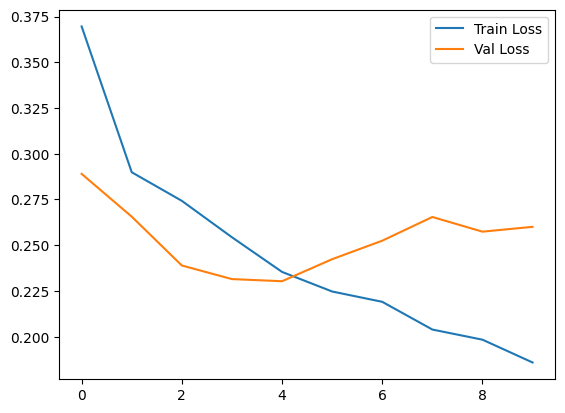

In [36]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.show()